In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Colour Histograms

### 1.1 Histogram Calculations and Plotting

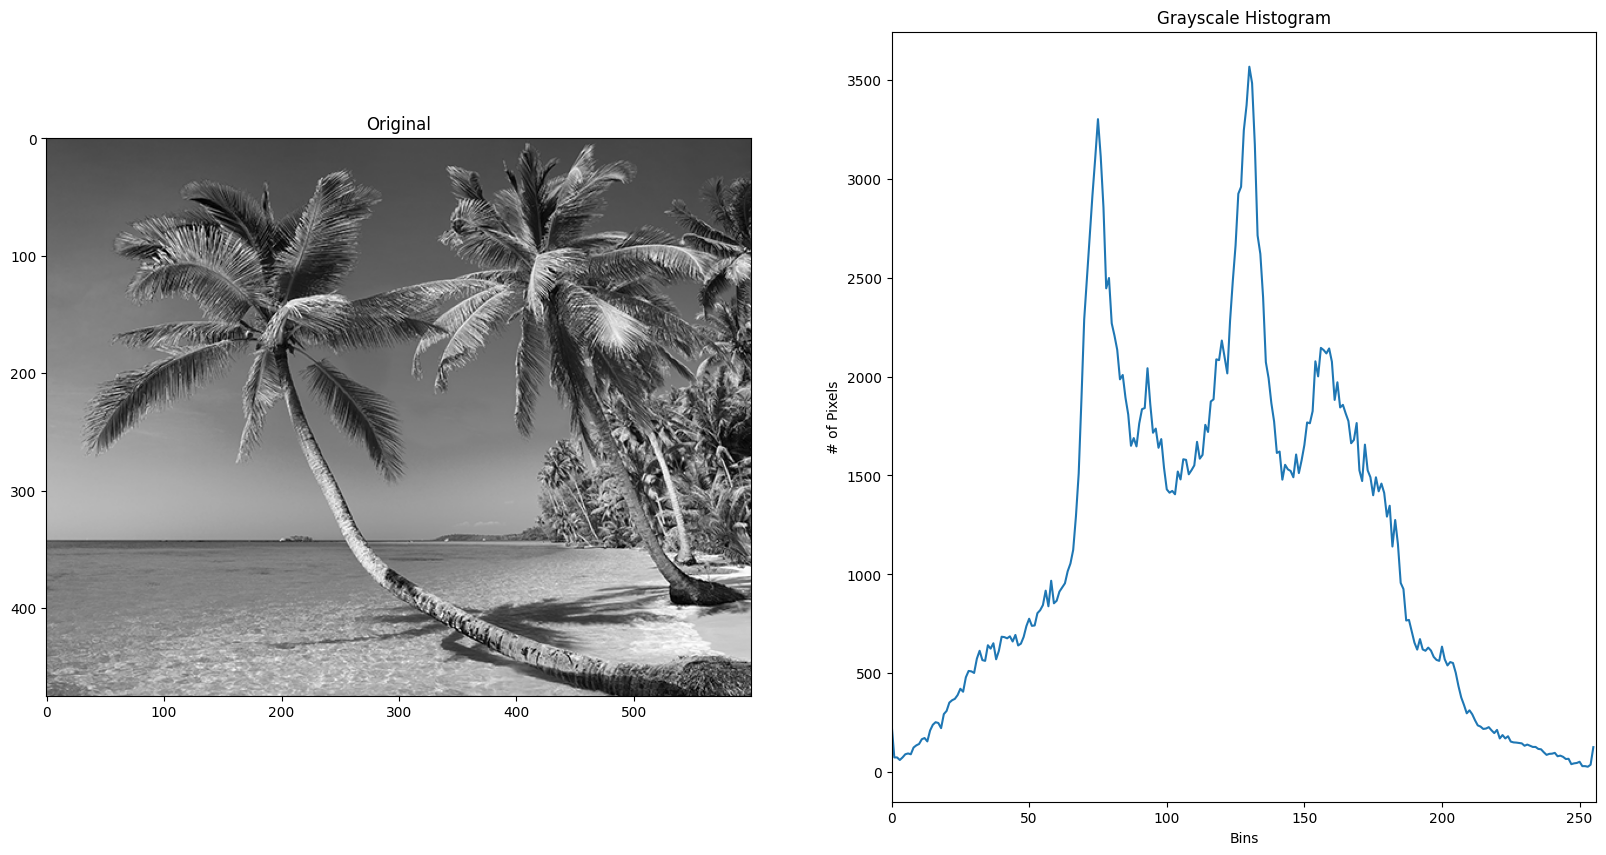

In [10]:
image = cv2.imread('../img/beach.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a grayscale histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
 
# matplotlib expects RGB images so convert and then display the image
# with matplotlib to avoid GUI conflicts/errors (mainly on macOS)
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.title('Original')
 
# plot the histogram
plt.subplot(122)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

plt.show()

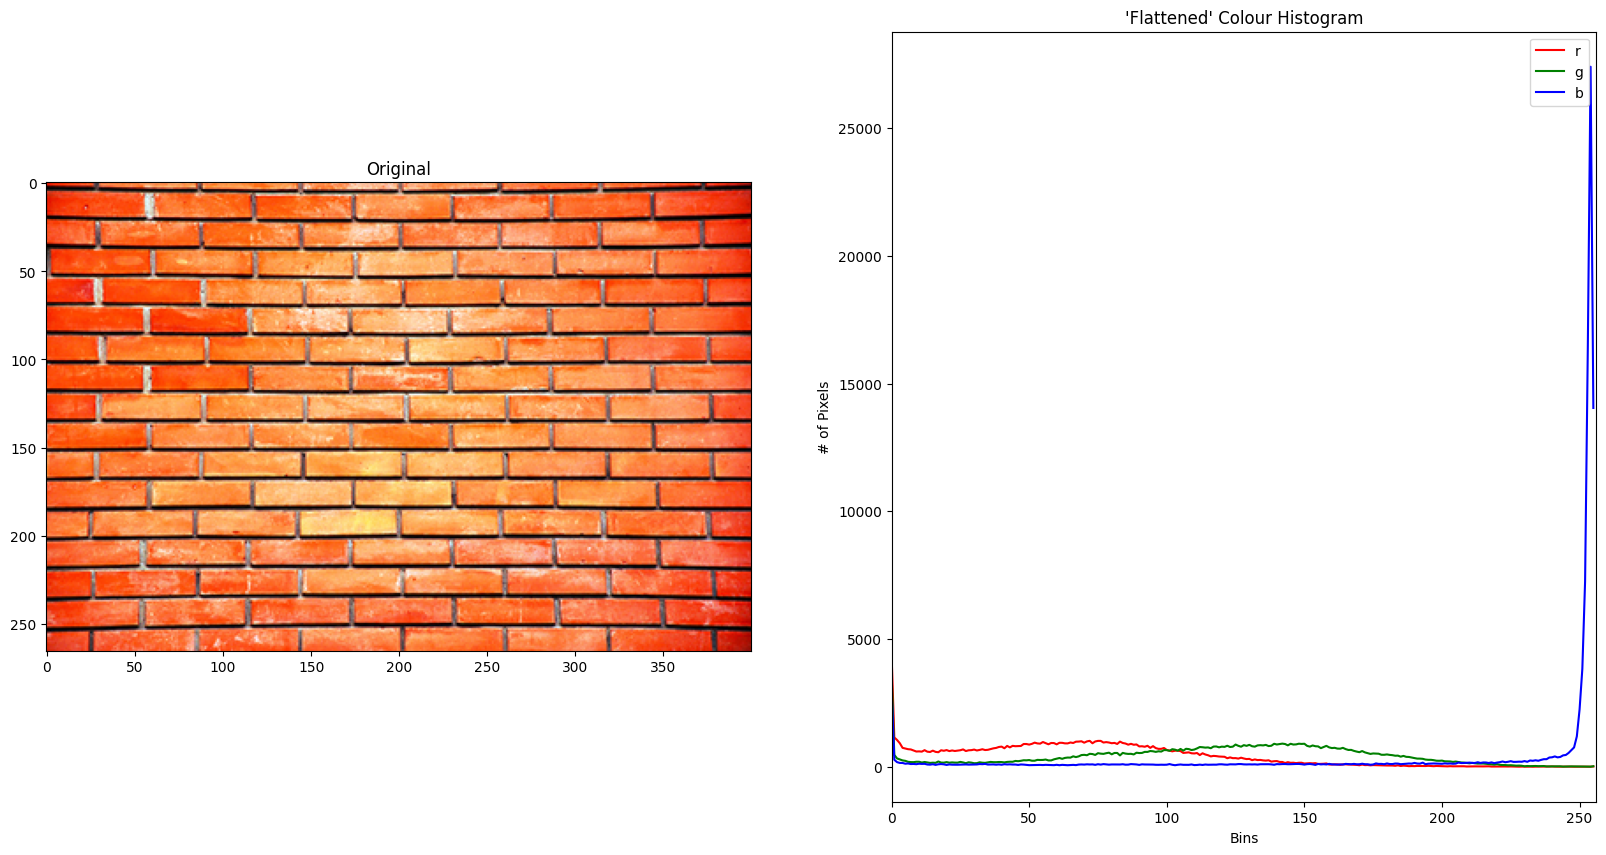

In [35]:
image = cv2.imread('../img/lego.jpg')

# grab the image channels, initialize the tuple of colors and the
# figure
chans = cv2.split(image)
colours = ("r", "g", "b")

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(np.flip(image, axis = 2))
plt.title('Original')

plt.subplot(122)
plt.title("'Flattened' Colour Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, colour) in zip(chans, colours):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=colour, label=colour)
    plt.xlim([0, 256])

plt.legend()
plt.show()

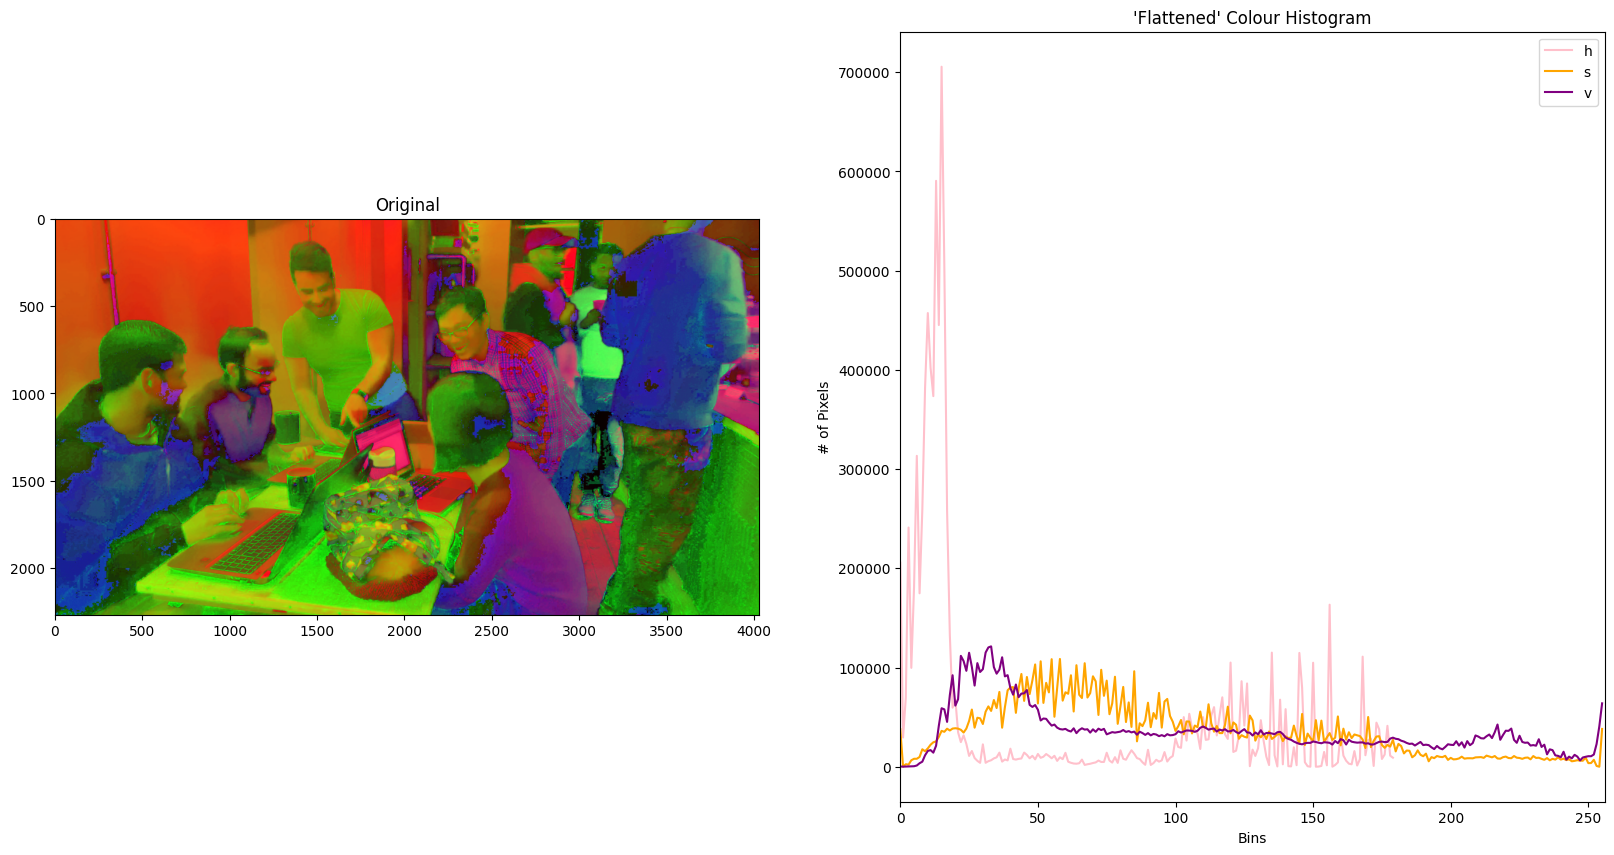

In [57]:
image = cv2.imread('../img/bml.webp')

# grab the image channels, initialize the tuple of colors and the
# figure
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
chans = cv2.split(image)
colours = ("h", "s", "v")
colour_mapping = {
    'h': 'pink',
    's': 'orange',
    'v': 'purple'
}

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(np.flip(image, axis = 2))
plt.title('Original')

plt.subplot(122)
plt.title("'Flattened' Colour Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, colour) in zip(chans, colours):
    # create a histogram for the current channel and plot it
    histSize = [256] if colour != "h" else [180] # valid Hue range is 0 to 180
    ranges = [0, 256] if colour != "h" else [0, 180] # Valid Hue range is 0 to 180
    hist = cv2.calcHist([chan], [0], None, histSize, ranges)
    plt.plot(hist, color=colour_mapping[colour], label=colour)
    plt.xlim([0, 256])

plt.legend()
plt.show()

### 1.2 Histogram Calculations and Plotting on Image Masks

In [7]:
def plot_histogram(image, title, mask=None):
    # grab the image channels, initialize the tuple of colors and
    # the figure
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
 
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

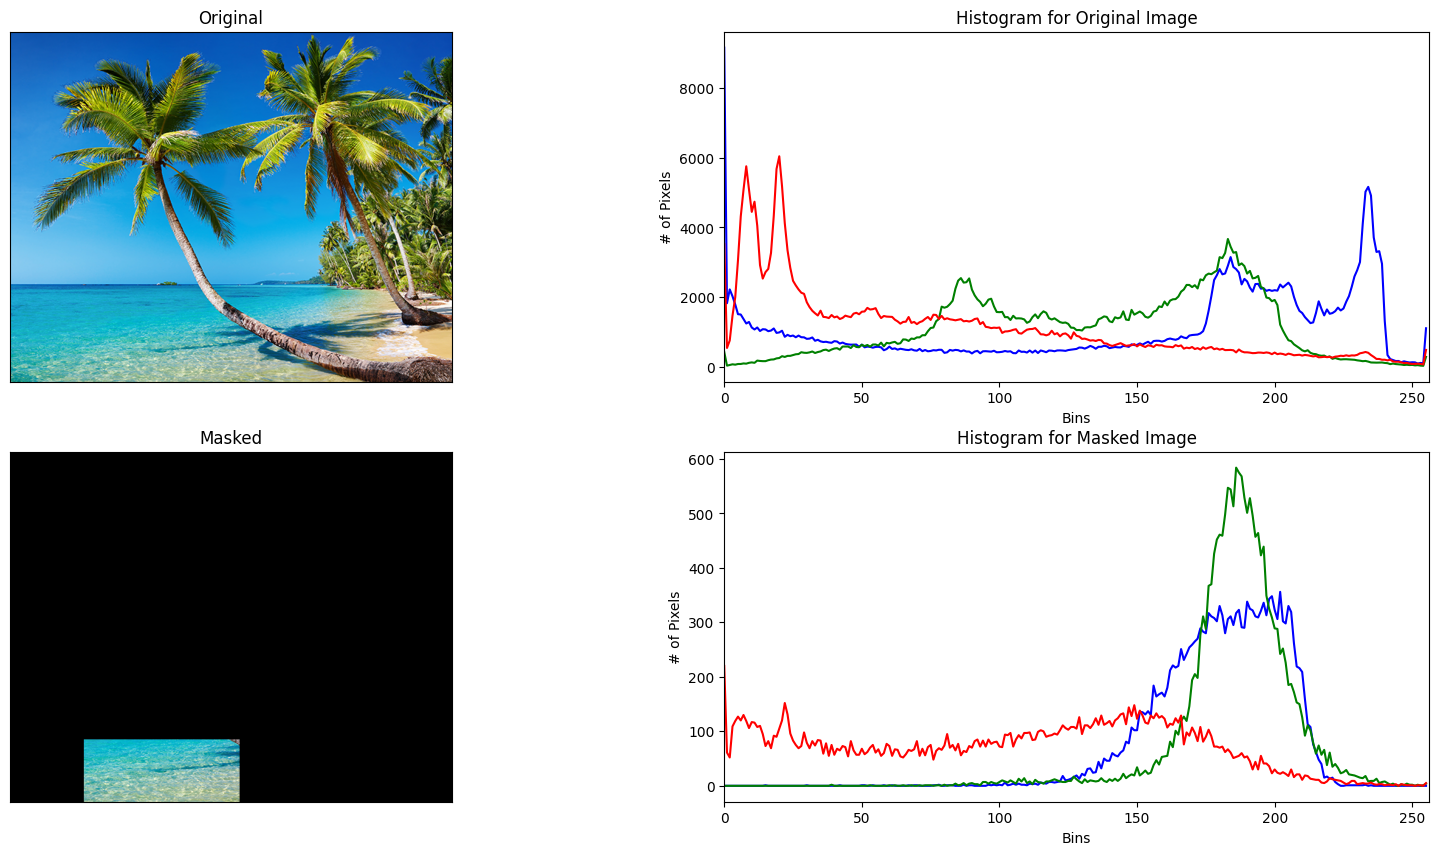

In [10]:
image = cv2.imread('../img/beach.png')

plt.figure(figsize=(20,10))


plt.subplot(221)
plt.imshow(np.flip(image, axis = 2))
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plot_histogram(image, "Histogram for Original Image")

mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (100, 490), (310, 390), 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(223)
plt.imshow(np.flip(masked, axis = 2))
plt.title('Masked'), plt.xticks([]), plt.yticks([])

plt.subplot(224)
# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)


plt.show()

### EXERCISE: Plot histograms for an image of a car and its mask

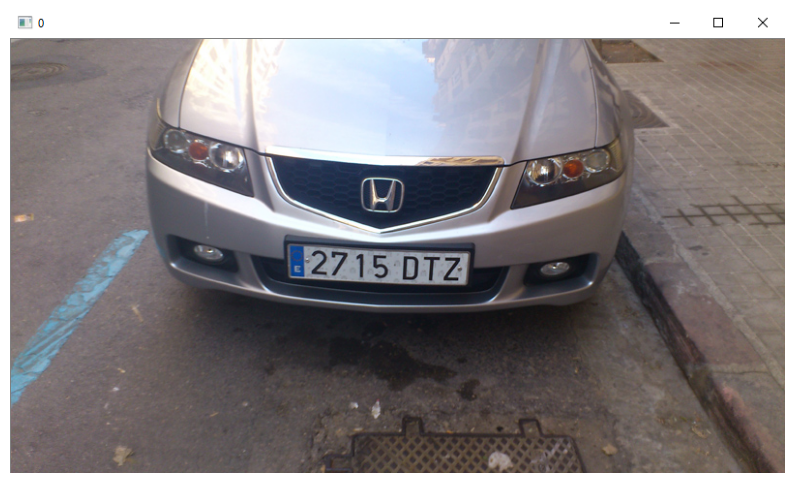

In [9]:
image = np.flip(cv2.imread('../img/licence_plate_raw.png'), axis=2)
show_image(image)

In [ ]:
# TODO: Plot a histogram for an image

### 1.3 Histogram Equalisation

In [60]:
def show_hist_cdf(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])

    plt.legend(('cdf','histogram'), loc = 'upper left')

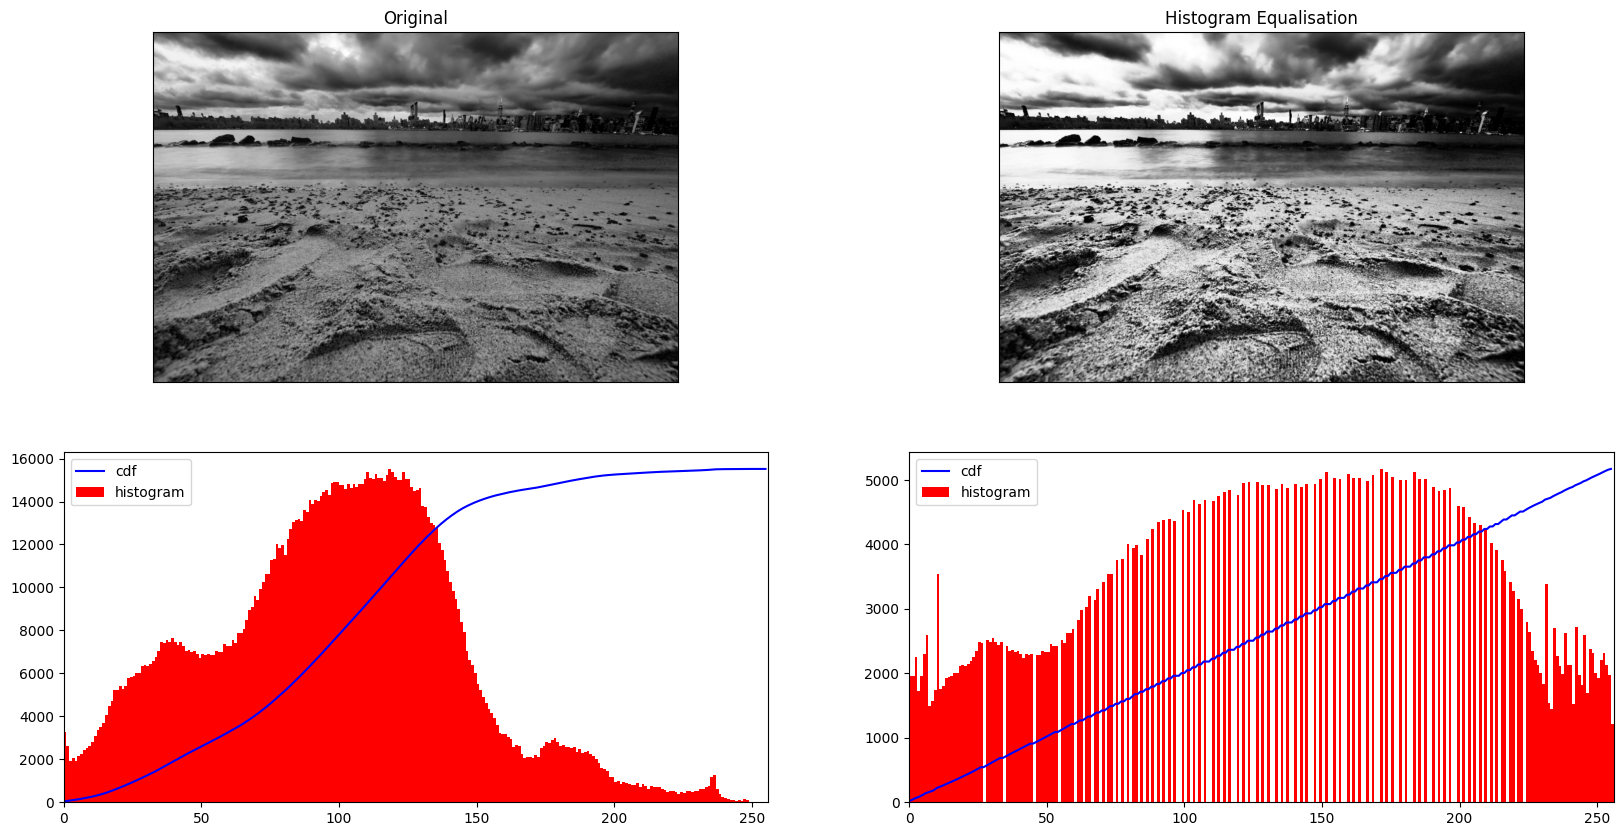

In [72]:
# load the image and convert it to grayscale
image = cv2.imread('../img/landscape.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# apply histogram equalization to stretch the contrast of our image
eq = cv2.equalizeHist(gray)
 
# show our images -- notice how the contrast of the second image has
# been stretched
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(gray, cmap ='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(eq, cmap ='gray')
plt.title('Histogram Equalisation'), plt.xticks([]), plt.yticks([])

plt.subplot(223)
show_hist_cdf(image)

plt.subplot(224)
show_hist_cdf(eq)

plt.show()

/var/folders/cr/zjhz9ss176d5vjy1s09bkj4c0000gn/T/ipykernel_80996/3551298508.py:5: RuntimeWarning: invalid value encountered in divide
  cdf_normalized = cdf * hist.max()/ cdf.max()


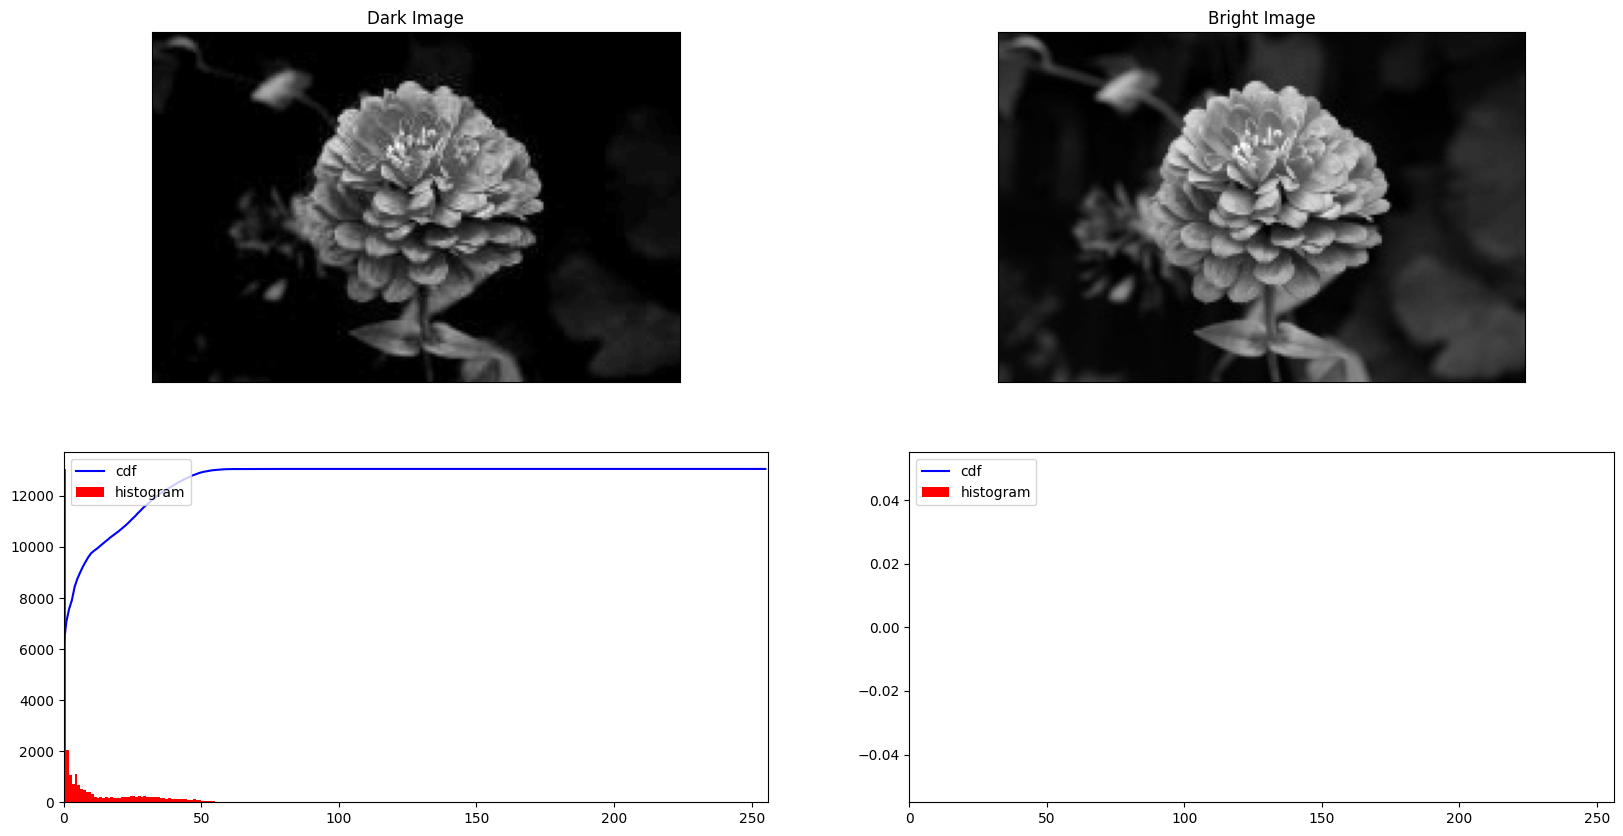

In [84]:
# load the image and convert it to grayscale
image1 = cv2.imread('../img/dark-flower.jpg')
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = cv2.imread('../img/light-flower.jpg')
image2 = image2 + 400
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
 
# show our images -- notice how the contrast of the second image has
# been stretched
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(gray1, cmap ='gray')
plt.title('Dark Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(gray2, cmap ='gray')
plt.title('Bright Image'), plt.xticks([]), plt.yticks([])

plt.subplot(223)
show_hist_cdf(gray1)

plt.subplot(224)
show_hist_cdf(gray2)

plt.show()

### PROJECT: Perform Canny Edge Detection on two versions of an image. The original and the enhanced equalised version. What's the difference in results?

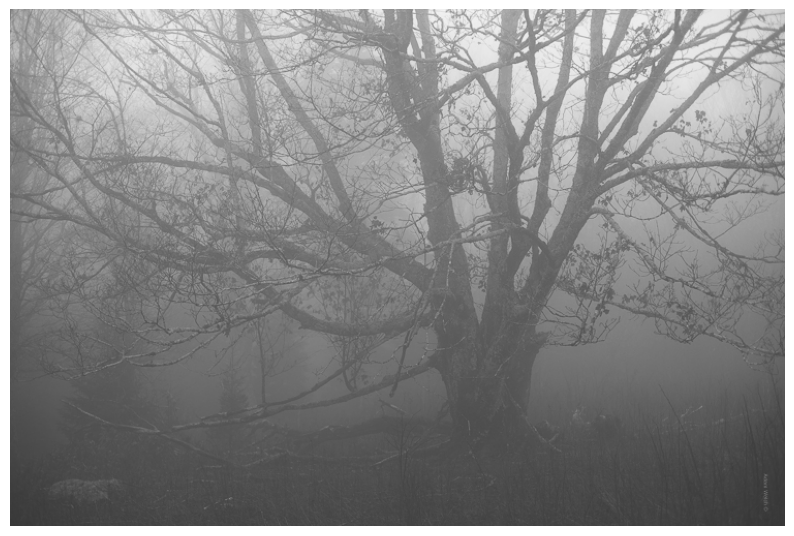

In [15]:
image = cv2.imread('../img/tree.jpg')
show_image(image)

In [16]:
# TODO: Your Code Below

In [17]:
# %load ../solutions/canny_equalised.py